In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [51]:
# loading data
data = pd.read_csv(r"C:\Users\garys\Desktop\TFG\TREBALL\BASE DE DADES\diabetes_binary_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [52]:
x = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"]
# building set of train_val and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"Train_val Counts: {x_train.shape[0]}\nTest Counts: {x_test.shape[0]}")

Train_val Counts: 202944
Test Counts: 50736


In [53]:
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.5916497018741398
Accuracy 0.8594489120151372


In [54]:
import warnings
warnings.simplefilter("ignore")
# I was getting the following warning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
# warnings.warn but it does not affect the output: https://github.com/tylerjrichards/Getting-Started-with-Streamlit-for-Data-Science/issues/5

# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=rf.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-1:], 
                                y_test[-1:], 
                                name='LIME')

In [55]:
warnings.simplefilter("ignore")
show(lime_local)

<!-- http://127.0.0.1:7001/2328520821152/ -->

In [30]:
x = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"]
# building set of train_val and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5930046860808805
Accuracy 0.8612030905077263


# t-SNE

In [33]:
# https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50736 samples in 0.002s...
[t-SNE] Computed neighbors for 50736 samples in 63.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50736
[t-SNE] Computed conditional probabilities for sample 2000 / 50736
[t-SNE] Computed conditional probabilities for sample 3000 / 50736
[t-SNE] Computed conditional probabilities for sample 4000 / 50736
[t-SNE] Computed conditional probabilities for sample 5000 / 50736
[t-SNE] Computed conditional probabilities for sample 6000 / 50736
[t-SNE] Computed conditional probabilities for sample 7000 / 50736
[t-SNE] Computed conditional probabilities for sample 8000 / 50736
[t-SNE] Computed conditional probabilities for sample 9000 / 50736
[t-SNE] Computed conditional probabilities for sample 10000 / 50736
[t-SNE] Computed conditional probabilities for sample 11000 / 50736
[t-SNE] Computed conditional probabilities for sample 12000 / 50736
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'T-SNE projection')]

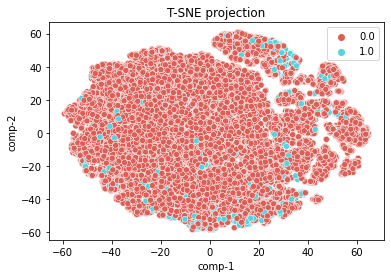

In [35]:
import seaborn as sns
df = pd.DataFrame()
df["y"] = y_pred
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

# PCA

In [40]:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features
x_test = StandardScaler().fit_transform(x_test)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pcadf = pd.DataFrame()
pcadf["y"] = y_pred
pcadf["comp-1"] = principalDf['principal component 1']
pcadf["comp-2"] = principalDf['principal component 2']

[Text(0.5, 1.0, 'PCA projection')]

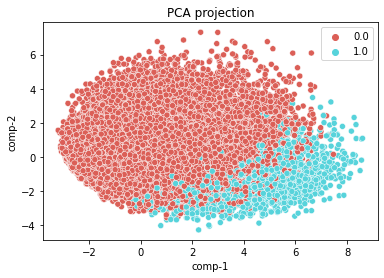

In [48]:
sns.scatterplot(x="comp-1", y="comp-2", hue=pcadf.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=pcadf).set(title="PCA projection")